## Case de IA - Customer churn

<p align='center'>
    <img src='https://www.questionpro.com/blog/wp-content/uploads/2018/03/churn.png'>
</p>

Neste case básico de IA, vamos analisar um dataset de churn de clientes de uma empresa de telecomunicações. O objetivo é criar um modelo de Machine Learning que seja capaz de prever se um cliente irá ou não cancelar seu plano.


O objetivo é que você tenha seu primeiro contato com um problema de Machine Learning, que você consiga entender como é mais ou menos o fluxo de trabalho e, principalmente, vá aprendendo os principais conceitos conforme for realizando.


Ao longo do case passaremos por tópicos como:

1. Visualização, análise e tratamento de dados
2. Split dos dados em treino e teste
3. Padronização dos dados
4. Criação de um modelo de Machine Learning
5. Avaliação do modelo
6. Otimização dos hiperparâmetros do modelo


## Referências gerais:
- https://www.datacamp.com/tutorial/introduction-machine-learning-python
- https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn (Capítulos 1 e 3)
- Livro: Introduction to Machine Learning with Python (Capítulo 2) - https://drive.google.com/drive/u/1/folders/10VdWCaR7qZ40K9rC5gWviKWMkMPzK8FB

Mais referências ao longo do case

### 0 - Antes de tudo...

Existem muitas formas de se resolver um problema de Machine Learning, no entanto, o **workflow** a ser seguido geralmente segue essa estrutura:
<p align='center'>
    <img src='https://editor.analyticsvidhya.com/uploads/80329Roadmap.PNG'>
</p>

Assim, comece importando as bibliotecas básicas, e carregando o dataset.

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn 
import category_encoders as ce
import scipy as sc



In [5]:
dados_do_case = pd.read_csv("Churn_train.csv")
display(dados_do_case)

FileNotFoundError: [Errno 2] No such file or directory: 'Churn_train.csv'

### 1 - Data Prep

Provavelmente, a etapa mais importante do processo. É a etapa de entendimento do problema a ser resolvido, entendimento dos dados que você possui e, principalmente, tratamento desses dados para poder extrair o máximo de informação possível.

Veja aqui algumas referências para um bom Data Prep:
- https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/
- https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

O objetivo aqui é verficar se os dados estão certinhos para serem utilizados em modelos. Assim,

- Verifique o tipo das variáveis (existem números como strings, por exemplo?)  
- Verifique se há valores nulos
- Verifique se há valores duplicados
- Verifique a presença de outliers (aqui pode ser bem útil plotar gráficos de distribuição das variáveis)
- Qual coluna é a variável *target* (aquilo que queremos prever)?
- Quais features são necessárias e quais não são?

In [43]:
dados_do_case.describe()
dados_do_case.info()
#Target variable = Churn
#Features necessárias
#Subscription Type, Contract Length, Gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [44]:
dados_do_case.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [76]:
dados_do_case.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
440828    False
440829    False
440830    False
440831    False
440832    False
Length: 440833, dtype: bool

In [77]:
display(dados_do_case)
sbn.boxplot(data=dados_do_case, x = "Age")


CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0                18.0          Standard          Annual       932.00   
1                 8.0             Basic         Monthly       557.00   
2                18.0             Basic       Quarterly       185.00   
3                 7.0          Standard         Monthly       396.00   
4                 8.0             Basic         Monthly       617.00   
...               ...               ...             ...          ...   
440828            3.0           Premium          Annual       716.38   
440829           20.0           Premium          Annual       745.38   
440830            5.0          Standard       Quarterly       977.31   
440831            0.0          Standard       Quarterly       602.55   
440832           14.0           Premium       Quarterly       567.77   

        Last Interaction  Churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440833 rows x 12 columns]

<Axes: xlabel='Age'>

In [78]:
sbn.boxplot(data=dados_do_case, x = "Tenure", color= "Blue")

<Axes: xlabel='Age'>

<Axes: xlabel='Usage Frequency'>

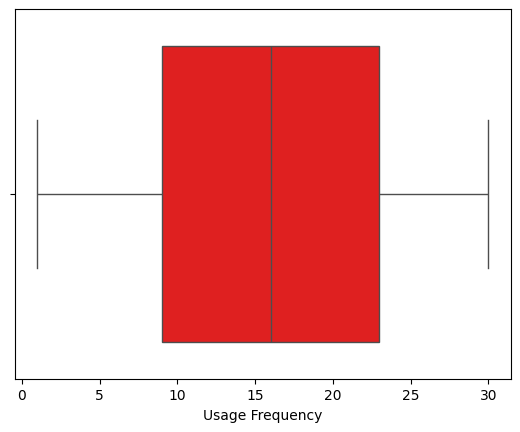

In [20]:
sbn.boxplot(data=dados_do_case, x = "Usage Frequency", color= "Red")

<Axes: xlabel='Support Calls'>

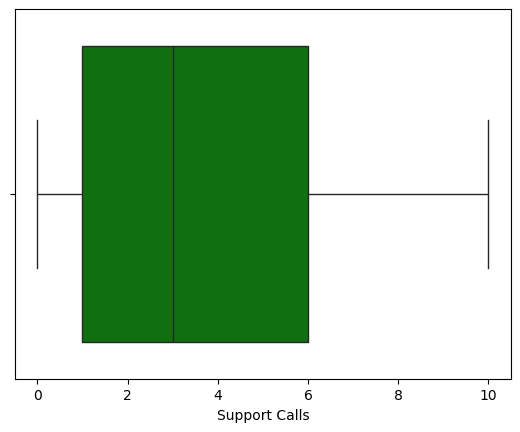

In [23]:
sbn.boxplot(data=dados_do_case, x = "Support Calls", color="Green")

<Axes: xlabel='Payment Delay'>

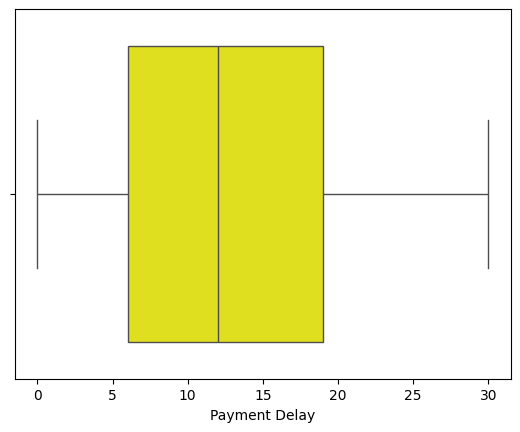

In [25]:
sbn.boxplot(data=dados_do_case, x = "Payment Delay", color="Yellow")

<Axes: xlabel='Payment Delay'>

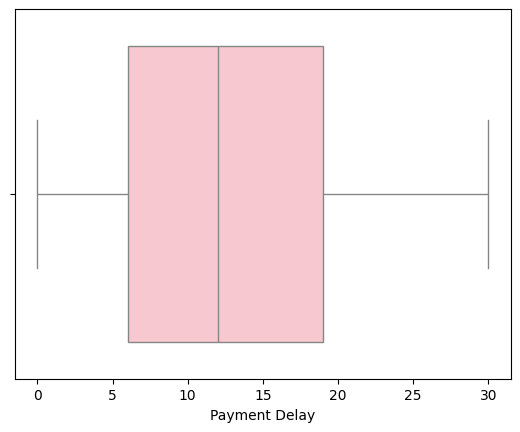

In [26]:
sbn.boxplot(data=dados_do_case, x = "Payment Delay", color="Pink")

<Axes: xlabel='Total Spend'>

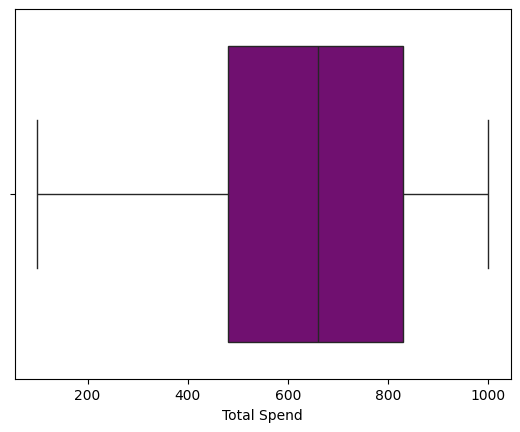

In [27]:
sbn.boxplot(data=dados_do_case, x = "Total Spend", color="Purple")

<Axes: xlabel='Last Interaction'>

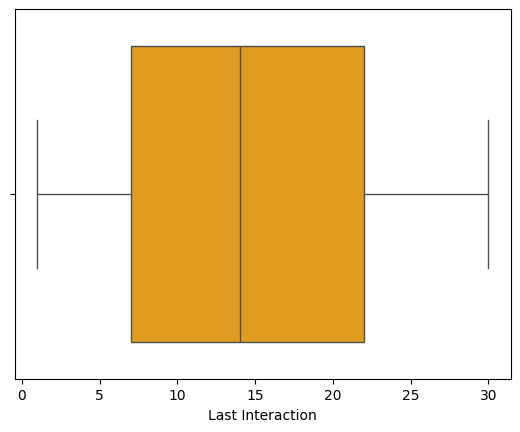

In [28]:
sbn.boxplot(data=dados_do_case, x = "Last Interaction", color="Orange")

### Encoding

Muitos algoritmos não só conseguem trabalhar com dados numéricos. Assim, um tratamento necessário é a transformação de variáveis categóricas em numéricas. 

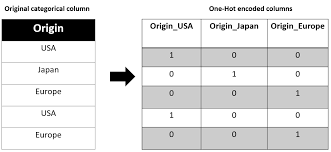

São formas de encoding mais comuns:
- Dummy encoding
- One-hot encoding
- Label encoding

Dê uma pesquisada nesses métodos e veja qual a forma mais adequada para as variáveis categóricas

In [124]:
display(dados_do_case)
one_hot_dados = ce.OneHotEncoder(cols= ["Subscription Type", "Contract Length", "Gender"], return_df=True, use_cat_names=True)
one_hot_dados_encode = one_hot_dados.fit_transform(dados_do_case)
one_hot_dados_SemNA = one_hot_dados_encode.dropna()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0            1.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
0                18.0          Standard          Annual       932.00   
1                 8.0             Basic         Monthly       557.00   
2                18.0             Basic       Quarterly       185.00   
3                 7.0          Standard         Monthly       396.00   
4                 8.0             Basic         Monthly       617.00   
...               ...               ...             ...          ...   
440828            3.0           Premium          Annual       716.38   
440829           20.0           Premium          Annual       745.38   
440830            5.0          Standard       Quarterly       977.31   
440831            0.0          Standard       Quarterly       602.55   
440832           14.0           Premium       Quarterly       567.77   

        Last Interaction  Churn  
0                   17.0    1.0  
1                    6.0    1.0  
2                    3.0    1.0  
3                   29.0    1.0  
4                   20.0    1.0  
...                  ...    ...  
440828               8.0    0.0  
440829               2.0    0.0  
440830               9.0    0.0  
440831               2.0    0.0  
440832              21.0    0.0  

[440833 rows x 12 columns]

In [125]:
one_hot_dados_SemNA.isnull().sum()
display(one_hot_dados_SemNA)
one_hot_dados_novos = one_hot_dados_SemNA.drop(columns=["CustomerID","Gender_nan", "Subscription Type_nan", "Contract Length_nan"])
display(one_hot_dados_novos)

CustomerID   Age  Gender_Female  Gender_Male  Gender_nan  Tenure  \
0              2.0  30.0              1            0           0    39.0   
1              3.0  65.0              1            0           0    49.0   
2              4.0  55.0              1            0           0    14.0   
3              5.0  58.0              0            1           0    38.0   
4              6.0  23.0              0            1           0    32.0   
...            ...   ...            ...          ...         ...     ...   
440828    449995.0  42.0              0            1           0    54.0   
440829    449996.0  25.0              1            0           0     8.0   
440830    449997.0  26.0              0            1           0    35.0   
440831    449998.0  28.0              0            1           0    55.0   
440832    449999.0  31.0              0            1           0    48.0   

        Usage Frequency  Support Calls  Payment Delay  \
0                  14.0            5.0           18.0   
1                   1.0           10.0            8.0   
2                   4.0            6.0           18.0   
3                  21.0            7.0            7.0   
4                  20.0            5.0            8.0   
...                 ...            ...            ...   
440828             15.0            1.0            3.0   
440829             13.0            1.0           20.0   
440830             27.0            1.0            5.0   
440831             14.0            2.0            0.0   
440832             20.0            1.0           14.0   

        Subscription Type_Standard  Subscription Type_Basic  \
0                                1                        0   
1                                0                        1   
2                                0                        1   
3                                1                        0   
4                                0                        1   
...                            ...                      ...   
440828                           0                        0   
440829                           0                        0   
440830                           1                        0   
440831                           1                        0   
440832                           0                        0   

        Subscription Type_Premium  Subscription Type_nan  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   
...                           ...                    ...   
440828                          1                      0   
440829                          1                      0   
440830                          0                      0   
440831                          0                      0   
440832                          1                      0   

        Contract Length_Annual  Contract Length_Monthly  \
0                            1                        0   
1                            0                        1   
2                            0                        0   
3                            0                        1   
4                            0                        1   
...                        ...                      ...   
440828                       1                        0   
440829                       1                        0   
440830                       0                        0   
440831                       0                        0   
440832                       0                        0   

        Contract Length_Quarterly  Contract Length_nan  Total Spend  \
0                               0                    0       932.00   
1                               0                    0       557.00   
2         

Age  Gender_Female  Gender_Male  Tenure  Usage Frequency  \
0       30.0              1            0    39.0             14.0   
1       65.0              1            0    49.0              1.0   
2       55.0              1            0    14.0              4.0   
3       58.0              0            1    38.0             21.0   
4       23.0              0            1    32.0             20.0   
...      ...            ...          ...     ...              ...   
440828  42.0              0            1    54.0             15.0   
440829  25.0              1            0     8.0             13.0   
440830  26.0              0            1    35.0             27.0   
440831  28.0              0            1    55.0             14.0   
440832  31.0              0            1    48.0             20.0   

        Support Calls  Payment Delay  Subscription Type_Standard  \
0                 5.0           18.0                           1   
1                10.0            8.0                           0   
2                 6.0           18.0                           0   
3                 7.0            7.0                           1   
4                 5.0            8.0                           0   
...               ...            ...                         ...   
440828            1.0            3.0                           0   
440829            1.0           20.0                           0   
440830            1.0            5.0                           1   
440831            2.0            0.0                           1   
440832            1.0           14.0                           0   

        Subscription Type_Basic  Subscription Type_Premium  \
0                             0                          0   
1                             1                          0   
2                             1                          0   
3                             0                          0   
4                             1                          0   
...                         ...                        ...   
440828                        0                          1   
440829                        0                          1   
440830                        0                          0   
440831                        0                          0   
440832                        0                          1   

        Contract Length_Annual  Contract Length_Monthly  \
0                            1                        0   
1                            0                        1   
2                            0                        0   
3                            0                        1   
4                            0                        1   
...                        ...                      ...   
440828                       1                        0   
440829                       1                        0   
440830                       0                        0   
440831                       0                        0   
440832                       0                        0   

        Contract Length_Quarterly  Total Spend  Last Interaction  Churn  
0                               0       932.00              17.0    1.0  
1                               0       557.00               6.0    1.0  
2                               1       185.00               3.0    1.0  
3                               0       396.00              29.0    1.0  
4                               0       617.00              20.0    1.0  
...                           ...          ...               ...    ...  
440828                          0       716.38               8.0    0.0  
440829                          0       745.38               2.0    0.0  
440830                          1       977.31               9.0    0.0  
440831                          1       602.55               2.0    0.0  
440832                          1       567.77              21.0    0.0  

[440832 rows x 16 co

### Matriz de correlação
Uma forma eficiênte de se ter uma ideia da relação entre as variáveis é saber como elas se correlacionam umas com as outras. Plote uma matriz de correlação e veja quais variáveis parecem mais correlacionadas com o target.

In [126]:
one_hot_dados_novos.corr()

Age  Gender_Female  Gender_Male    Tenure  \
Age                         1.000000       0.031419    -0.031419 -0.011630   
Gender_Female               0.031419       1.000000    -1.000000 -0.007978   
Gender_Male                -0.031419      -1.000000     1.000000  0.007978   
Tenure                     -0.011630      -0.007978     0.007978  1.000000   
Usage Frequency            -0.007190      -0.007978     0.007978 -0.026800   
Support Calls               0.158451       0.091212    -0.091212 -0.027640   
Payment Delay               0.061738       0.048449    -0.048449 -0.016588   
Subscription Type_Standard -0.001847       0.002469    -0.002469 -0.011580   
Subscription Type_Basic     0.004768       0.000725    -0.000725  0.027270   
Subscription Type_Premium  -0.002873      -0.003189     0.003189 -0.015415   
Contract Length_Annual     -0.034986      -0.029391     0.029391  0.009021   
Contract Length_Monthly     0.086909       0.067611    -0.067611 -0.020637   
Contract Length_Quarterly  -0.035617      -0.025533     0.025533  0.007744   
Total Spend                -0.084684      -0.066138     0.066138  0.019006   
Last Interaction            0.028980      -0.134786     0.134786 -0.006903   
Churn                       0.218394       0.175395    -0.175395 -0.051919   

                            Usage Frequency  Support Calls  Payment Delay  \
Age                               -0.007190       0.158451       0.061738   
Gender_Female                     -0.007978       0.091212       0.048449   
Gender_Male                        0.007978      -0.091212      -0.048449   
Tenure                            -0.026800      -0.027640      -0.016588   
Usage Frequency                    1.000000      -0.022013      -0.014470   
Support Calls                     -0.022013       1.000000       0.162889   
Payment Delay                     -0.014470       0.162889       1.000000   
Subscription Type_Standard        -0.000244      -0.004453      -0.000805   
Subscription Type_Basic            0.000096       0.010780       0.005085   
Subscription Type_Premium          0.000149      -0.006219      -0.004229   
Contract Length_Annual             0.006943      -0.091068      -0.049697   
Contract Length_Monthly           -0.017820       0.223242       0.122674   
Contract Length_Quarterly          0.007534      -0.090289      -0.049961   
Total Spend                        0.018631      -0.221594      -0.121044   
Last Interaction                  -0.004662       0.077684       0.042708   
Churn                             -0.046101       0.574267       0.312129   

                            Subscription Type_Standard  \
Age                                          -0.001847   
Gender_Female                                 0.002469   
Gender_Male                                  -0.002469   
Tenure                                       -0.011580   
Usage Frequency                              -0.000244   
Support Calls                                -0.004453   
Payment Delay                                -0.000805   
Subscription Type_Standard                    1.000000   
Subscription Type_Basic                      -0.495506   
Subscription Type_Premium                    -0.510065   
Contract Length_Annual                        0.000695   
Contract Length_Monthly                      -0.005794   
Contract Length_Quarterly                     0.004013   
Total Spend                                   0.004501   
Last Interaction                             -0.000171   
Churn                                        -0.009247   

                            Subscription Type_Basic  \
Age                                        0.004768   
Gender_Female                              0.000725   
Gender_Male                               -0.000725   
Tenure                                     0.027270   
Usage Frequency                            0.000096   
Support Calls                              0.010780   
Payment Delay           

#### Bônus
Uma coisa que vocês precisam saber é que, apesar de parecer muito difícil no começo, Machine Learning em python é uma mãe e sempre existe uma forma mais incrivelmente fácil de se fazer qualquer coisa.

Depois de fazer toda a sua análise exploratória, teste o *pandas_profiling* e veja o que ele te retorna.

In [65]:
from ydata_profiling import ProfileReport
#Features importantes pakas: Age, Gender_Female, Support Calls,Payment Delay,Contract Length_Monthly,Last Interaction	



In [66]:
ProfileReport(one_hot_dados_novos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data split
Para um algoritmo de Machine Learning funcionar, é necessário que ele primeiro aprenda com uma certa quantidade dos dados disponíveis a identificar padrões. A esse conjunto, chamamos de "treino".

Após o treino, é necessário verficar como ele lida diante de novos dados. Esse conjunto com a outra parte dos dados, chamamos de "teste". Sendo assim, divida seu dataset em treino e teste.

In [127]:
#Dados de treino
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Customer ID n é uma feature importante, Tenure, Usage Frequency e Total Spend

X = one_hot_dados_novos[["Age", "Gender_Female", "Support Calls","Payment Delay","Contract Length_Monthly","Last Interaction"]]
Y = one_hot_dados_novos["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3)

print(X.shape, X_train.shape, X_test.shape, Y.shape, Y_test.shape, Y_train.shape)

(440832, 6) (308582, 6) (132250, 6) (440832,) (132250,) (308582,)


### Scaling
Último ponto dessa etapa. Veja que as variáveis possuem escalas diferentes. Enquanto algumas variáveis estão na casa das dezenas, outras estão na casa das centenas. Isso pode ser um problema para alguns algoritmos de Machine Learning, que podem acabar dando mais importância para as variáveis com maior escala. Transforme seus dados de modo com que fiquem na mesma escala

In [128]:
print(one_hot_dados_novos.std())

scaler = StandardScaler()

scaler.fit(X_train)

Age                            12.442369
Gender_Female                   0.495399
Gender_Male                     0.495399
Tenure                         17.255727
Usage Frequency                 8.586242
Support Calls                   3.070218
Payment Delay                   8.258063
Subscription Type_Standard      0.473127
Subscription Type_Basic         0.468168
Subscription Type_Premium       0.472777
Contract Length_Annual          0.490295
Contract Length_Monthly         0.398182
Contract Length_Quarterly       0.489990
Total Spend                   240.803001
Last Interaction                8.596208
Churn                           0.495477
dtype: float64


StandardScaler()

In [130]:
scaler.fit(X_test)

StandardScaler()

In [129]:
X_train_standardized = scaler.transform(X_train)
print(X_train_standardized)
print(X_train_standardized.std())

[[ 0.13056286 -0.87266491 -0.84787103  0.24643793 -0.49626842 -0.29012909]
 [ 1.57801215  1.14591522 -0.19670854  0.73112499  2.01503857  1.33838936]
 [-0.11067869 -0.87266491 -0.84787103  0.0040944  -0.49626842 -0.0574836 ]
 ...
 [-1.39730028  1.14591522 -0.84787103  2.06401441  2.01503857  0.52413013]
 [-1.07564488 -0.87266491 -0.19670854  2.06401441 -0.49626842 -0.75542008]
 [ 0.29139056  1.14591522  0.45445394  0.73112499 -0.49626842  0.29148464]]
1.0


In [131]:
X_test_standardized = scaler.transform(X_test)
print(X_test_standardized)
print(X_test_standardized.std())

[[-0.27016212 -0.87268079  1.43280657  0.36702103 -0.49614537  1.46020916]
 [-0.67151258  1.14589437 -0.84927425 -1.56758465 -0.49614537 -0.75043476]
 [ 0.5325388   1.14589437  1.10679502  0.48793388 -0.49614537  1.2275098 ]
 ...
 [-0.59124249  1.14589437  1.43280657  0.00428246  2.01553832  1.11116012]
 [ 0.69307899  1.14589437 -0.19725116 -1.08393323 -0.49614537 -0.05233668]
 [ 1.57605    -0.87268079  1.10679502 -1.44667179  2.01553832  0.6457614 ]]
1.0


### 2 - Criação do modelo

Existem dois principais tipos de problemas de ML: regressão e classificação. Enquanto o primeiro se refere à previsão de valores numéricos, o segundo, como o nome já diz, se refere à classificação de valores em categorias.

Para classificação, existem alguns algoritmos mais comuns que você pode tentar:
Cursos:
- [Supervised Learning with scikit-learn - DataCamp](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn)
- [Linear Classifiers in python - DataCamp](https://app.datacamp.com/learn/courses/linear-classifiers-in-python)

Vídeos:
- [Vídeo do Dev sobre Random Forest](https://www.youtube.com/watch?v=ho1eI54ykoU&pp=ygUHZmVhIGRldg%3D%3D)
- [StatsQuest: LogisticRegression (teoria)](https://www.youtube.com/watch?v=yIYKR4sgzI8)
- [StatsQuest: KNN (teoria)](https://www.youtube.com/watch?v=HVXime0nQeI&pp=ugMICgJwdBABGAE%3D)


Escolha pelo menos dois modelos. Treine e teste com os dados que você separou anteriormente e gere as previsões

In [2]:
from sklearn.linear_model import LogisticRegression
log_regre = LogisticRegression()
log_regre.fit(X_train_standardized, Y_train)
Y_reg_predict = log_regre.predict(X_train_standardized)

NameError: name 'X_train_standardized' is not defined

In [133]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train_standardized, Y_train)

Y_prediction = dtc.predict(X_test_standardized)

### 3 - Avaliação do modelo

Uma vez feitas as previsões, é preciso verificar o quão próximas da realidade elas foram. Para problemas de classificação, as métricas mais comuns de se utilizar são: acurácia, precisão e AUC. Você pode ter uma melhor visualização nesse cheat sheet:

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

Para um entendimento mais profundo sobre cada uma das métricas, seguem também algumas referências:

- [StatsQuest: ROC e AUC](https://www.youtube.com/watch?v=4jRBRDbJemM&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=7)
- [StatsQuest: Confusion Matrix](https://www.youtube.com/watch?v=Kdsp6soqA7o&list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF&index=3)
- [12 Important Model Evaluation Metrics for Machine Learning Everyone Should Know ](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

**Avalie as previsões do seu modelo e veja qual deles se saiu melhor.**

In [1]:
#Avaliando o modelo de regressão logistica
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Vendo primeiro a acurácia 
print(f'valor da acurácia no treino {log_regre.score(X_train_standardized, Y_train)}')
print(f'valor da acurácia no teste {log_regre.score(X_test_standardized, Y_test)}')
print(classification_report(Y_test,Y_prediction))

NameError: name 'log_regre' is not defined

In [135]:
#Avaliando o modelo de arvóre de decisão

#Fazendo o confusion matrix
print(confusion_matrix(Y_test, Y_prediction))
print(classification_report(Y_test, Y_prediction))

#Aparentemente quem foi melhor foi a árvore de decisão

[[55115  2001]
 [ 3110 72024]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     57116
         1.0       0.97      0.96      0.97     75134

    accuracy                           0.96    132250
   macro avg       0.96      0.96      0.96    132250
weighted avg       0.96      0.96      0.96    132250



### 4 - Otimização do modelo
Cada função do scikit-learn na verdade tem vários parâmetros que podem ser ajustados a depender dos seus dados e do seu objetivo e nem sempre os valores padrão são os melhores. O processo de otimização desses hiperparâmetros nada mais é do que iterar sobre as diferentes possibilidades de valores que esses parâmetros podem assumir e ver qual combinação deles gera o melhor resultado.

A forma mais comum de realizar essa otimização é através do GridSearch CV, mas a biblioteca Optuna também é uma excelente opção.

O capítulo 3 do curso de Supervised Learning oferece um guia de como realizar esse processo - https://app.datacamp.com/learn/courses/supervised-learning-with-scikit-learn

**Realize a otimização dos hiperparâmetros**

### Hyperparameter tunning

In [136]:
#Importando a GridSearchCV pra conseguir fazer a iteração sobre os parâmetros
from sklearn.model_selection import GridSearchCV

param_grid_logistic_rg = [{
    "C": range(1,40),
    "penalty": ['l1', "l2", "elasticnet"],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}]

grid_logistic_rg = GridSearchCV(log_regre, 
                                param_grid_logistic_rg,
                                scoring="precision",
                                n_jobs= -1,
                                cv = 2)

In [137]:
grid_logistic_rg.fit(X_train_standardized, Y_train)

c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
780 fits failed out of a total of 1404.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': range(1, 40),
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             scoring='precision')

In [143]:
#Vendo o score dos melhores parâmetros usados 
grid_logistic_rg.best_score_

0.9018554789015346

In [144]:
#Os parâmetros mais importantes da regressão logistica e seus valores para atingir o best score, por isso é a melhor forma de fazer a logistic regression de antes baseado na precision
grid_logistic_rg.best_params_

{'C': 11, 'penalty': 'l2', 'solver': 'lbfgs'}

In [145]:
#Melhorando os modelos de Árvore de Decisão
from sklearn.model_selection import GridSearchCV
param_grid_arvore_de_decid = [{
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": ["sqrt", "log2"],
    "max_features": ["auto", "sqrt", "log2"]
}]

grid_arvore_de_decid = GridSearchCV(dtc,
                                    param_grid_arvore_de_decid,
                                    scoring= "precision",
                                    n_jobs= -1,
                                    cv = 2
                                    )


In [146]:
grid_arvore_de_decid.fit(X_train_standardized, Y_train)

c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario(a) Master\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Usuario(a) Master\AppData\Local\Programs\Pyth

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='precision')

In [147]:
#Avaliando o melhor score baseado em accuracy
grid_arvore_de_decid.best_score_

0.9665852995106605

In [ ]:
#Como podemos ver, a árvore de decisão ja estava de muita boa qualidade, com os hiperparâmetros melhorou um pouco.